In [1]:
from ml.nn import *
from datasets.dataset import load_mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(one_hot=False)

In [3]:
img = np.reshape(x_train[1], (28, 28))

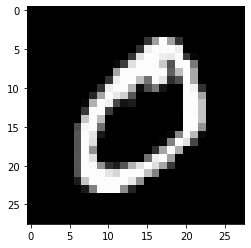

In [4]:
plt.imshow(img, cmap="gray")
plt.show()

In [5]:
input_size = 784
output_size = 10
middle_layer_size = 50
lr = 0.0005
optimizer = 'Adam'

In [6]:
model = Sequential()
model.addlayer(Linear(input_size, middle_layer_size, optimizer=optimizer, lr=lr))
model.addlayer(ReLU(optimizer=optimizer, lr=lr))
model.addlayer(Linear(middle_layer_size, middle_layer_size, optimizer=optimizer, lr=lr))
model.addlayer(ReLU(optimizer=optimizer, lr=lr))
model.addlayer(Linear(middle_layer_size, output_size, optimizer=optimizer, lr=lr))
network = Classifier(model)

In [7]:
batch_size = 100
epoch = 10
n_train = x_train.shape[0]
n_test = x_test.shape[0]

In [8]:
for e in range(epoch):
    print('epoch %d'%e)
    randinds = np.random.permutation(n_train)
    for it in range(0, n_train, batch_size):
        ind = randinds[it:it+batch_size]
        x = x_train[ind]
        t = t_train[ind]
        loss, acc = network.update(x, t)
    train_loss, train_acc = network.predict(x, t)
    print('train, loss %f, acc %f'%(train_loss, train_acc))

    acctest = 0
    losstest = 0
    for it in range(0, n_test, batch_size):
        x = x_test[it:it+batch_size]
        t = t_test[it:it+batch_size]
        loss, acc = network.predict(x, t)
        acctest += int(acc * batch_size)
        losstest += loss
    acctest /= (1.0 * n_test)
    losstest /= (n_test // batch_size)
    print('test, loss %f, acc %f'%(loss, acc))


epoch 0
train, loss 0.299105, acc 0.890000
test, loss 0.418593, acc 0.900000
epoch 1
train, loss 0.246664, acc 0.930000
test, loss 0.386609, acc 0.900000
epoch 2
train, loss 0.231125, acc 0.950000
test, loss 0.324190, acc 0.910000
epoch 3
train, loss 0.067930, acc 0.990000
test, loss 0.309421, acc 0.910000
epoch 4
train, loss 0.138987, acc 0.960000
test, loss 0.296366, acc 0.920000
epoch 5
train, loss 0.099863, acc 0.970000
test, loss 0.266118, acc 0.940000
epoch 6
train, loss 0.227459, acc 0.960000
test, loss 0.243745, acc 0.940000
epoch 7
train, loss 0.106460, acc 0.960000
test, loss 0.220828, acc 0.950000
epoch 8
train, loss 0.162806, acc 0.940000
test, loss 0.212559, acc 0.950000
epoch 9
train, loss 0.074377, acc 0.970000
test, loss 0.212360, acc 0.950000


In [11]:
x_test.shape

(10000, 784)